In [8]:
# importing the modules and setting absolute path

import os
import sys


PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))

print("PROJECT_ROOT =", PROJECT_ROOT)
print("Exists? ->", os.path.exists(PROJECT_ROOT))

if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from src.data.load_data import load_creditcard_data

plt.style.use("seaborn-v0_8")
sns.set_theme()


PROJECT_ROOT = /home/linux/PyCharmMiscProject/projects/adaptive-cost-sensitive-loss
Exists? -> True


In [9]:
# Loading full DataFrame

data_path = os.path.join(PROJECT_ROOT, "data", "raw", "creditcard.csv")

print("CSV path:", data_path)
print("File exists? ->", os.path.exists(data_path))

df = pd.read_csv(data_path)
df.head()

CSV path: /home/linux/PyCharmMiscProject/projects/adaptive-cost-sensitive-loss/data/raw/creditcard.csv
File exists? -> True


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
# Basic info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [12]:
# Class distributiin

class_counts = df["Class"].value_counts().sort_index()
class_counts

Class
0    284315
1       492
Name: count, dtype: int64

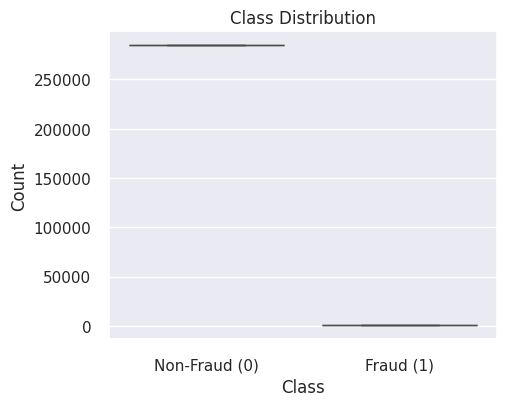

In [13]:
plt.figure(figsize = (5, 4))
sns.boxplot(x=class_counts.index, y=class_counts.values)
plt.xticks([0, 1], ["Non-Fraud (0)", "Fraud (1)"])
plt.title("Class Distribution")
plt.ylabel("Count")
plt.show()



In [14]:
imbalence_ratio = class_counts[0] / class_counts[1]
print(f"Imbalance ratio (non fraud : fraud) is approx {imbalence_ratio}")

Imbalance ratio (non fraud : fraud) is approx 577.8760162601626


In [15]:
# missing values check
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

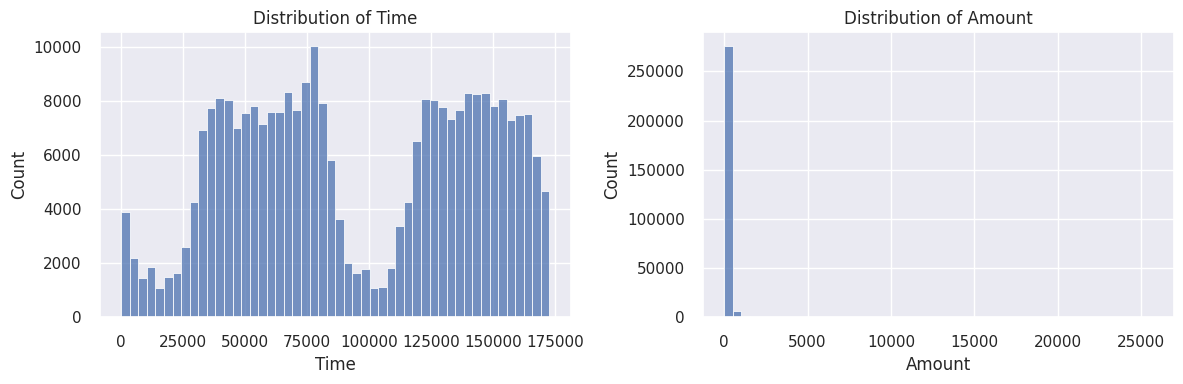

In [17]:
# feature distribution
num_cols = ["Time", "Amount"]

fig, axes = plt.subplots(1, len(num_cols), figsize = (12, 4))
for ax, col in zip(axes, num_cols):
    sns.histplot(data=df, x=col, bins=50, ax=ax)
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

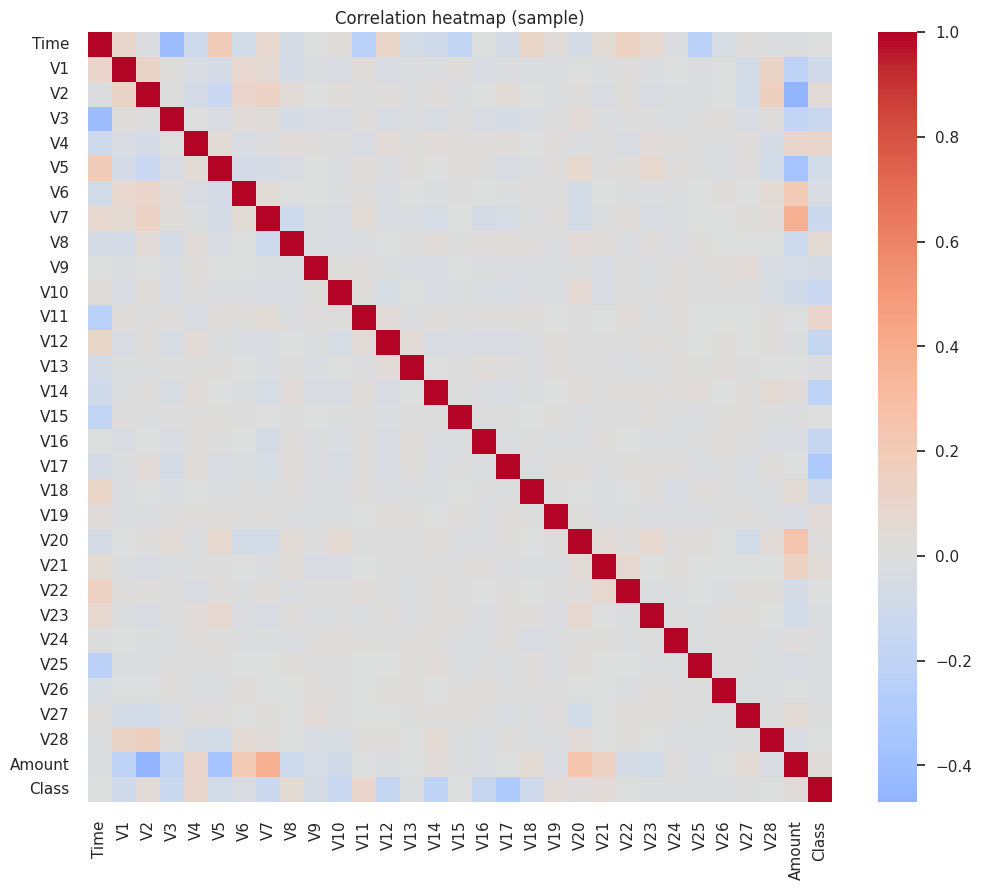

In [18]:
# sample subset correlation heatmap
sample_df = df.sample(n=10000, random_state=42) if len(df) > 10000 else df

corr = sample_df.corr(numeric_only=True)

plt.figure(figsize = (12, 10))

sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation heatmap (sample)")
plt.show()

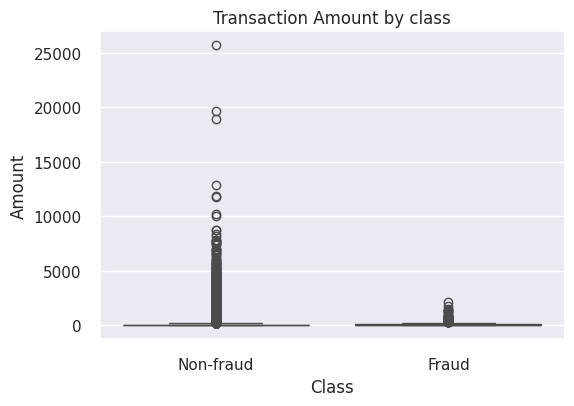

In [19]:
# fraud vs non fraud amount comparison
plt.figure(figsize = (6, 4))
sns.boxplot(data=df, x="Class", y="Amount")
plt.xticks([0,1], ["Non-fraud", "Fraud"])
plt.title("Transaction Amount by class")
plt.show()